In [1]:
from datetime import datetime
from CurveDataFetcher import CurveDataFetcher 
from utils.viz import plot_yields, plot_yield_curve_date_range, run_basic_linear_regression

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
        'figure.figsize': (15, 5),
        'axes.labelsize': 'x-large',
        'axes.titlesize':'x-large',
        'xtick.labelsize':'x-large',
        'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)
import os
from dotenv import dotenv_values
env_path = os.path.join(os.getcwd(), ".env")
config = dotenv_values(env_path)

import nest_asyncio
nest_asyncio.apply()

%load_ext autoreload
%autoreload 2

In [2]:
curve_data_fetcher = CurveDataFetcher(use_ust_issue_date=True, fred_api_key=config["FRED_API_KEY"])

In [12]:
curve_data_fetcher.ust_data_fetcher.cme_ust_label_to_cusip("4.75s 2053-11-15")

{'cusip': '912810TV0',
 'security_type': 'Bond',
 'auction_date': Timestamp('2024-01-11 00:00:00'),
 'issue_date': Timestamp('2024-01-16 00:00:00'),
 'maturity_date': Timestamp('2053-11-15 00:00:00'),
 'price_per100': '108.773246',
 'allocation_pctage': '25.590000',
 'avg_med_yield': '4.160000',
 'bid_to_cover_ratio': '2.370000',
 'comp_accepted': '20966180200',
 'comp_tendered': '49682325000',
 'corpus_cusip': '912803GW7',
 'tint_cusip_1': 'null',
 'currently_outstanding': '45445000000.000000',
 'direct_bidder_accepted': '3712937200',
 'direct_bidder_tendered': '6777200000',
 'est_pub_held_mat_by_type_amt': '91910000000',
 'fima_included': 'Yes',
 'fima_noncomp_accepted': '0',
 'fima_noncomp_tendered': '0',
 'high_discnt_rate': 'null',
 'high_investment_rate': 'null',
 'high_price': '108.773246',
 'high_yield': '4.2290',
 'indirect_bidder_accepted': '14209125000',
 'indirect_bidder_tendered': '16007125000',
 'int_rate': 4.75,
 'low_investment_rate': 'null',
 'low_price': 'null',
 'low

In [42]:
# cmt_yields_df = curve_data_fetcher.fred_data_fetcher.get_historical_cmt_yields(
#     start_date=datetime(2023, 1, 1),
#     end_date=datetime(2024, 9, 23),
# )

cmt_yields_df = curve_data_fetcher.ust_data_fetcher.get_historical_cmt_yields(
    start_date=datetime(2023, 1, 1),
    end_date=datetime(2024, 9, 23),
)

cmt_yields_df

Fetching from treasury.gov...


,Date,CMT1M,CMT2M,CMT3M,CMT4M,CMT6M,CMT1,CMT2,CMT3,CMT5,CMT7,CMT10,CMT20,CMT30
0,2024-01-02,5.55,5.54,5.46,5.41,5.24,4.80,4.33,4.09,3.93,3.95,3.95,4.25,4.08
1,2024-01-03,5.54,5.54,5.48,5.41,5.25,4.81,4.33,4.07,3.90,3.92,3.91,4.21,4.05
2,2024-01-04,5.56,5.48,5.48,5.41,5.25,4.85,4.38,4.14,3.97,3.99,3.99,4.30,4.13
3,2024-01-05,5.54,5.48,5.47,5.41,5.24,4.84,4.40,4.17,4.02,4.04,4.05,4.37,4.21
4,2024-01-08,5.54,5.48,5.49,5.39,5.24,4.82,4.36,4.11,3.97,3.99,4.01,4.33,4.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,2024-09-16,5.11,5.10,4.96,4.88,4.55,3.96,3.56,3.42,3.41,3.51,3.63,4.01,3.94
178,2024-09-17,5.05,5.05,4.95,4.87,4.55,3.99,3.59,3.45,3.44,3.53,3.65,4.02,3.96
179,2024-09-18,4.91,4.91,4.84,4.76,4.50,3.95,3.61,3.49,3.47,3.58,3.70,4.08,4.03
180,2024-09-19,4.89,4.91,4.80,4.73,4.46,3.93,3.59,3.47,3.49,3.60,3.73,4.11,4.06


In [66]:
ct_tenors = ["CT6M", "CT1", "CT2", "CT3", "CT5", "CT7", "CT10", "CT20", "CT30"]
ct_yields_df = curve_data_fetcher.fedinvest_data_fetcher.get_historical_ct_yields(
    start_date=datetime(2015, 1, 1), end_date=datetime(2024, 9, 23), tenors=ct_tenors, 
)
ct_yields_df = ct_yields_df.dropna()
ct_yields_df

,Date,CT6M,CT1,CT2,CT3,CT5,CT7,CT10,CT20,CT30
1331,2020-05-22,0.161986,0.180553,0.202687,0.229475,0.338029,0.559125,0.748791,1.306850,1.535750
1336,2020-06-01,0.173927,0.172527,0.140695,0.199378,0.306787,0.500000,0.660739,1.216982,1.457903
1337,2020-06-02,0.183125,0.172031,0.187904,0.252740,0.376503,0.591382,0.762235,1.317951,1.555025
1338,2020-06-03,0.175905,0.173505,0.140738,0.199515,0.306848,0.499999,0.660757,1.217002,1.457932
1339,2020-06-04,0.165559,0.173503,0.172298,0.199583,0.319543,0.518239,0.680337,1.236692,1.483318
...,...,...,...,...,...,...,...,...,...,...
2398,2024-09-16,4.565448,3.976937,3.565032,3.419217,3.410313,3.504681,3.624807,4.005601,3.938635
2399,2024-09-17,4.586186,4.009053,3.598081,3.452476,3.437690,3.524829,3.643436,4.026036,3.955872
2400,2024-09-18,4.501816,3.976696,3.614517,3.485831,3.472033,3.575513,3.699684,4.092439,4.025616
2401,2024-09-19,4.480527,3.955097,3.597509,3.474746,3.492646,3.600898,3.726020,4.115509,4.060924


In [43]:
recessions = [
    [datetime(1961, 4, 1), datetime(1961, 2, 1)],
    [datetime(1969, 12, 1), datetime(1970, 11, 1)],
    [datetime(1973, 11, 1), datetime(1975, 3, 1)],
    [datetime(1980, 1, 1), datetime(1980, 7, 1)],
    [datetime(1981, 7, 1), datetime(1982, 11, 1)],
    [datetime(1990, 7, 1), datetime(1991, 3, 1)],
    [datetime(2001, 3, 1), datetime(2001, 11, 1)],
    [datetime(2007, 12, 1), datetime(2009, 6, 1)],
    [datetime(2020, 2, 1), datetime(2020, 4, 1)],
]

In [45]:
cmt_yields_df["2s3s"] = cmt_yields_df["CMT3"] - cmt_yields_df["CMT2"]
cmt_yields_df["2s5s"] = cmt_yields_df["CMT5"] - cmt_yields_df["CMT2"]
cmt_yields_df["2s7s"] = cmt_yields_df["CMT7"] - cmt_yields_df["CMT2"]
cmt_yields_df["2s10s"] = cmt_yields_df["CMT10"] - cmt_yields_df["CMT2"]
cmt_yields_df["2s30s"] = cmt_yields_df["CMT30"] - cmt_yields_df["CMT2"]
cmt_yields_df["5s30s"] = cmt_yields_df["CMT30"] - cmt_yields_df["CMT5"]
cmt_yields_df["5s7s"] = cmt_yields_df["CMT7"] - cmt_yields_df["CMT5"]
cmt_yields_df["5s10s"] = cmt_yields_df["CMT10"] - cmt_yields_df["CMT5"]
cmt_yields_df["7s10s"] = cmt_yields_df["CMT10"] - cmt_yields_df["CMT7"]
cmt_yields_df["2s5s10s"] = (cmt_yields_df["CMT5"] - cmt_yields_df["CMT2"]) - (cmt_yields_df["CMT10"] - cmt_yields_df["CMT5"])
cmt_yields_df["2s5s7s"] = (cmt_yields_df["CMT5"] - cmt_yields_df["CMT2"]) - (cmt_yields_df["CMT7"] - cmt_yields_df["CMT5"])
cmt_yields_df["2s5s7s-2s5s10s"] = cmt_yields_df["2s5s7s"] - cmt_yields_df["2s5s10s"] 

plot_yields(
    cmt_yields_df,
    y_cols=[
        "2s3s", 
        "2s5s", 
        "2s7s", 
        "2s10s",
        "5s10s",
        "5s7s",
        "7s10s",
        "2s5s10s",
        "2s5s7s",
        # # "2s5s7s-2s5s10s"
    ],
    custom_title="Curve Spreads",
    recessions=recessions,
)

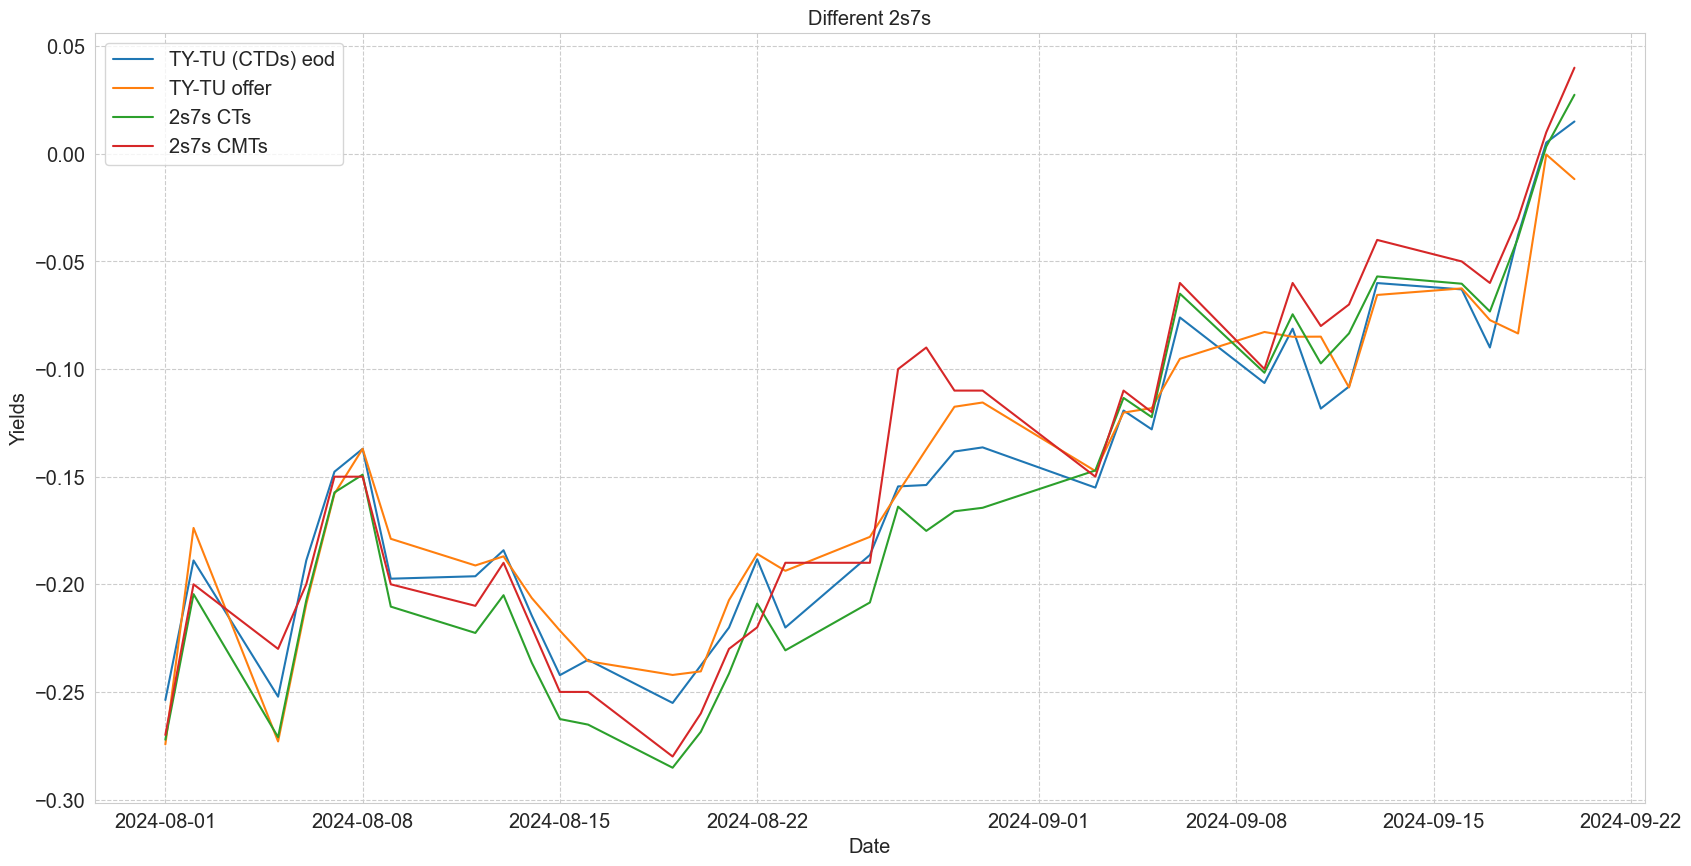

In [77]:
# ctd for tuz4 and tyz4
tuz4_ctd_cusip = curve_data_fetcher.ust_data_fetcher.ust_label_to_cusip(
    ust_label="4.625s 2026-09-15"
)["cusip"]
tyz4_ctd_cusip = curve_data_fetcher.ust_data_fetcher.ust_label_to_cusip(
    ust_label="4.25s 2031-06-30"
)["cusip"]

start = datetime(2024, 8, 1)
ctd_yields_dict_df = curve_data_fetcher.fedinvest_data_fetcher.cusips_timeseries(
    cusips=[tuz4_ctd_cusip, tyz4_ctd_cusip], start_date=start
)
ty_tu_spread_df = pd.merge(
    left=ctd_yields_dict_df[tyz4_ctd_cusip][
        ["Date", "eod_yield", "bid_yield", "offer_yield"]
    ],
    right=ctd_yields_dict_df[tuz4_ctd_cusip][
        ["Date", "eod_yield", "bid_yield", "offer_yield"]
    ],
    suffixes=("_ty", "_tu"),
    on="Date",
    how="outer",
)

ty_tu_spread_df["ty_tu_eod_ytm"] = (
    ty_tu_spread_df["eod_yield_ty"] - ty_tu_spread_df["eod_yield_tu"]
)
ty_tu_spread_df["ty_tu_bid_ytm"] = (
    ty_tu_spread_df["bid_yield_ty"] - ty_tu_spread_df["bid_yield_tu"]
)
ty_tu_spread_df["ty_tu_offer_ytm"] = (
    ty_tu_spread_df["offer_yield_ty"] - ty_tu_spread_df["offer_yield_tu"]
)

cmt_yields_df["cmt_2s7s"] = cmt_yields_df["CMT7"] - cmt_yields_df["CMT2"]
ty_tu_spread_df = pd.merge(
    left=ty_tu_spread_df, right=cmt_yields_df[cmt_yields_df["Date"] >= start][["Date", "cmt_2s7s"]], on="Date", how="outer"
)

ct_yields_df["ct_2s7s"] = ct_yields_df["CT7"] - ct_yields_df["CT2"]
ty_tu_spread_df = pd.merge(
    left=ty_tu_spread_df, right=ct_yields_df[ct_yields_df["Date"] >= start][["Date", "ct_2s7s"]], on="Date", how="outer"
)

plt.figure(figsize=(20, 10))

plt.plot(ty_tu_spread_df["Date"], ty_tu_spread_df["ty_tu_eod_ytm"], label="TY-TU (CTDs) eod")
# plt.plot(ty_tu_spread_df["Date"], ty_tu_spread_df["ty_tu_bid_ytm"], label="TY-TU bid")
plt.plot(ty_tu_spread_df["Date"], ty_tu_spread_df["ty_tu_offer_ytm"], label="TY-TU offer")
plt.plot(ty_tu_spread_df["Date"], ty_tu_spread_df["ct_2s7s"], label="2s7s CTs")
plt.plot(ty_tu_spread_df["Date"], ty_tu_spread_df["cmt_2s7s"], label="2s7s CMTs")

plt.xlabel("Date")
plt.ylabel("Yields")
plt.title("Different 2s7s")
plt.legend(fontsize="x-large")
plt.grid(True)
plt.show()


In [63]:
ct_yields_df["2s3s"] = ct_yields_df["CT3"] - ct_yields_df["CT2"]
ct_yields_df["2s5s"] = ct_yields_df["CT5"] - ct_yields_df["CT2"]
ct_yields_df["2s7s"] = ct_yields_df["CT7"] - ct_yields_df["CT2"]
ct_yields_df["2s10s"] = ct_yields_df["CT10"] - ct_yields_df["CT2"]
ct_yields_df["5s7s"] = ct_yields_df["CT7"] - ct_yields_df["CT5"]
ct_yields_df["5s10s"] = ct_yields_df["CT10"] - ct_yields_df["CT5"]
ct_yields_df["7s10s"] = ct_yields_df["CT10"] - ct_yields_df["CT7"]
ct_yields_df["2s5s10s"] = (ct_yields_df["CT5"] - ct_yields_df["CT2"]) - (ct_yields_df["CT10"] - ct_yields_df["CT5"])
ct_yields_df["2s5s7s"] = (ct_yields_df["CT5"] - ct_yields_df["CT2"]) - (ct_yields_df["CT7"] - ct_yields_df["CT5"])
ct_yields_df["2s5s7s-2s5s10s"] = ct_yields_df["2s5s7s"] - ct_yields_df["2s5s10s"] 

plot_yields(
    ct_yields_df,
    y_cols=[
        # "2s3s", 
        # "2s5s", 
        "2s7s", 
        # "2s10s",
        "5s10s",
        "5s7s",
        "7s10s",
        "2s5s10s",
        "2s5s7s",
        # # "2s5s7s-2s5s10s"
    ],
    custom_title="Curve Spreads",
    recessions=recessions,
)

In [78]:
plot_yield_curve_date_range(
    df=ct_yields_df[["Date"] + ct_tenors],
    date_range=[datetime(2024, 9, 19), datetime(2024, 8, 19), datetime(2024, 7, 19)],
)

In [22]:
fwds_df = curve_data_fetcher.fred_data_fetcher.fred.get_multiple_series(
    series_ids=["T5YIFR", "THREEFF1", "THREEFF2"], observation_start=datetime(2000, 1, 1), one_df=True, enable_date_col=True,
)
fwds_df = pd.merge(left=cmt_yields_df, right=fwds_df, on="Date", how="outer")
fwds_df

,Date,CMT3M,CMT6M,CMT1,CMT2,CMT3,CMT5,CMT7,CMT10,CMT20,...,5s10s,7s10s,2s5s10s,2s5s7s,2s5s7s-2s5s10s,2s30s,5s30s,T5YIFR,THREEFF1,THREEFF2
0,2000-01-03,5.27,5.55,6.09,6.38,6.42,6.50,6.65,6.58,6.94,...,0.08,-0.07,0.04,-0.03,-0.07,0.23,0.11,NaN,6.4449,6.6944
1,2000-01-04,5.27,5.50,6.00,6.30,6.34,6.40,6.56,6.49,6.84,...,0.09,-0.07,0.01,-0.06,-0.07,0.23,0.13,NaN,6.3971,6.6299
2,2000-01-05,5.28,5.49,6.05,6.38,6.43,6.51,6.68,6.62,6.95,...,0.11,-0.06,0.02,-0.04,-0.06,0.26,0.13,NaN,6.4638,6.7137
3,2000-01-06,5.25,5.44,6.03,6.35,6.39,6.46,6.63,6.57,6.86,...,0.11,-0.06,0.00,-0.06,-0.06,0.23,0.12,NaN,6.4358,6.6817
4,2000-01-07,5.22,5.42,6.00,6.31,6.35,6.42,6.58,6.52,6.82,...,0.10,-0.06,0.01,-0.05,-0.06,0.24,0.13,NaN,6.4078,6.6485
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6445,2024-09-16,4.75,4.41,3.96,3.56,3.42,3.41,3.51,3.63,4.01,...,0.22,0.12,-0.37,-0.25,0.12,0.38,0.53,2.24,NaN,NaN
6446,2024-09-17,4.75,4.41,3.99,3.59,3.45,3.44,3.53,3.65,4.02,...,0.21,0.12,-0.36,-0.24,0.12,0.37,0.52,2.27,NaN,NaN
6447,2024-09-18,4.65,4.37,3.95,3.61,3.49,3.47,3.58,3.70,4.08,...,0.23,0.12,-0.37,-0.25,0.12,0.42,0.56,2.26,NaN,NaN
6448,2024-09-19,4.61,4.34,3.93,3.59,3.47,3.49,3.60,3.73,4.11,...,0.24,0.13,-0.34,-0.21,0.13,0.47,0.57,2.30,NaN,NaN


In [53]:
df = fwds_df[["Date", "2s10s", "2s7s", "2s5s10s", "2s30s", "5s30s", "T5YIFR", "THREEFF1"]].dropna()
df = df[df["Date"] > datetime(2024, 1, 1)]
df

,Date,2s10s,2s7s,2s5s10s,2s30s,5s30s,T5YIFR,THREEFF1
6261,2024-01-02,-0.38,-0.38,-0.42,-0.25,0.15,2.25,4.1775
6262,2024-01-03,-0.42,-0.41,-0.44,-0.28,0.15,2.23,4.1718
6263,2024-01-04,-0.39,-0.39,-0.43,-0.25,0.16,2.26,4.2167
6264,2024-01-05,-0.35,-0.36,-0.41,-0.19,0.19,2.25,4.2436
6265,2024-01-08,-0.35,-0.37,-0.43,-0.19,0.20,2.25,4.2111
...,...,...,...,...,...,...,...,...
6440,2024-09-09,0.02,-0.10,-0.40,0.32,0.51,2.20,3.4709
6441,2024-09-10,0.06,-0.06,-0.38,0.38,0.54,2.18,3.4077
6442,2024-09-11,0.03,-0.08,-0.37,0.34,0.51,2.18,3.4193
6443,2024-09-12,0.04,-0.07,-0.38,0.36,0.53,2.17,3.4273


                            OLS Regression Results                            
Dep. Variable:                  5s30s   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     1119.
Date:                Sat, 21 Sep 2024   Prob (F-statistic):           5.94e-78
Time:                        13:04:28   Log-Likelihood:                 281.18
No. Observations:                 177   AIC:                            -558.4
Df Residuals:                     175   BIC:                            -552.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.6406      0.042     38.802      0.0

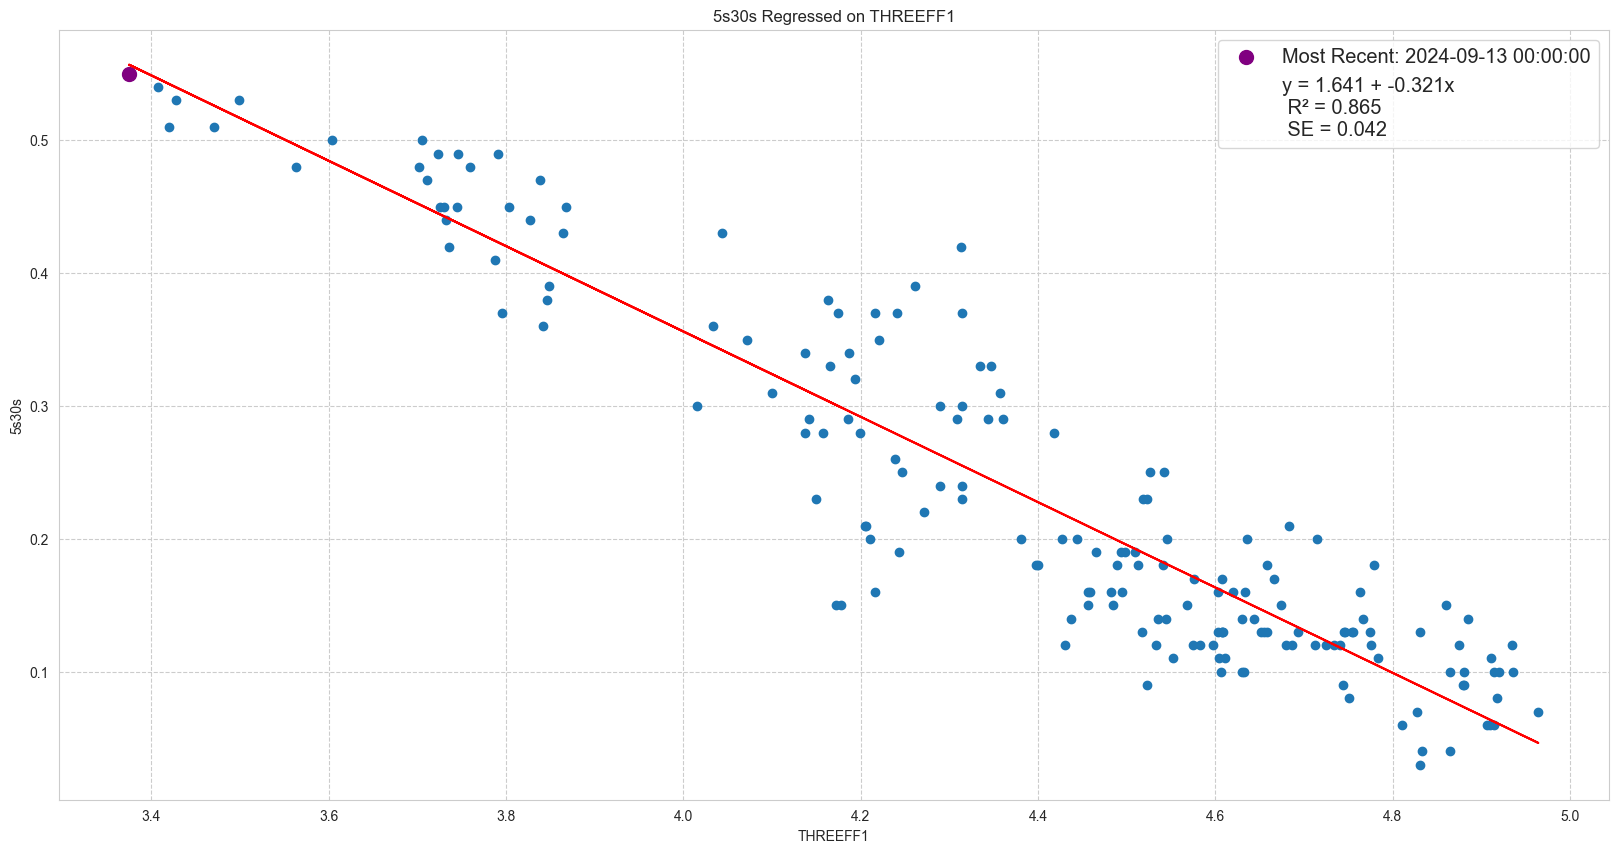

In [55]:
run_basic_linear_regression(df=df, x_col="THREEFF1", y_col="5s30s")